# Kaggle - Sberbank Russian Housing Market
## Exploratory Data Analysis

## Contents
* [Target Variable - House Price](#Target Variable - House Price)
* [House Prices Over Time](#House Prices Over Time)
* [Missing Data](#Missing Data)
* [House Size vs. Price](#House Size vs. Price)

In [101]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
sns.set_style("darkgrid")

In [2]:
fname_train = 'data/train.csv'
fname_test = 'data/test.csv'
fname_macro = 'data/macro.csv'

In [3]:
df_train = pd.read_csv(fname_train)
df_test = pd.read_csv(fname_test)
df_macro = pd.read_csv(fname_macro)

In [123]:
### Column datatype formatting
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'], format="%Y-%m-%d")

In [50]:
### Target variable
y = df_train['price_doc']
log_y = np.log(y)

In [4]:
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [ ]:
#### DATA CLEANING STEPS
# REMOVED 1 OUTLIER FROM FULL_SQ

<a id="Target Variable - House Price"></a>
## Target Variable - House Price

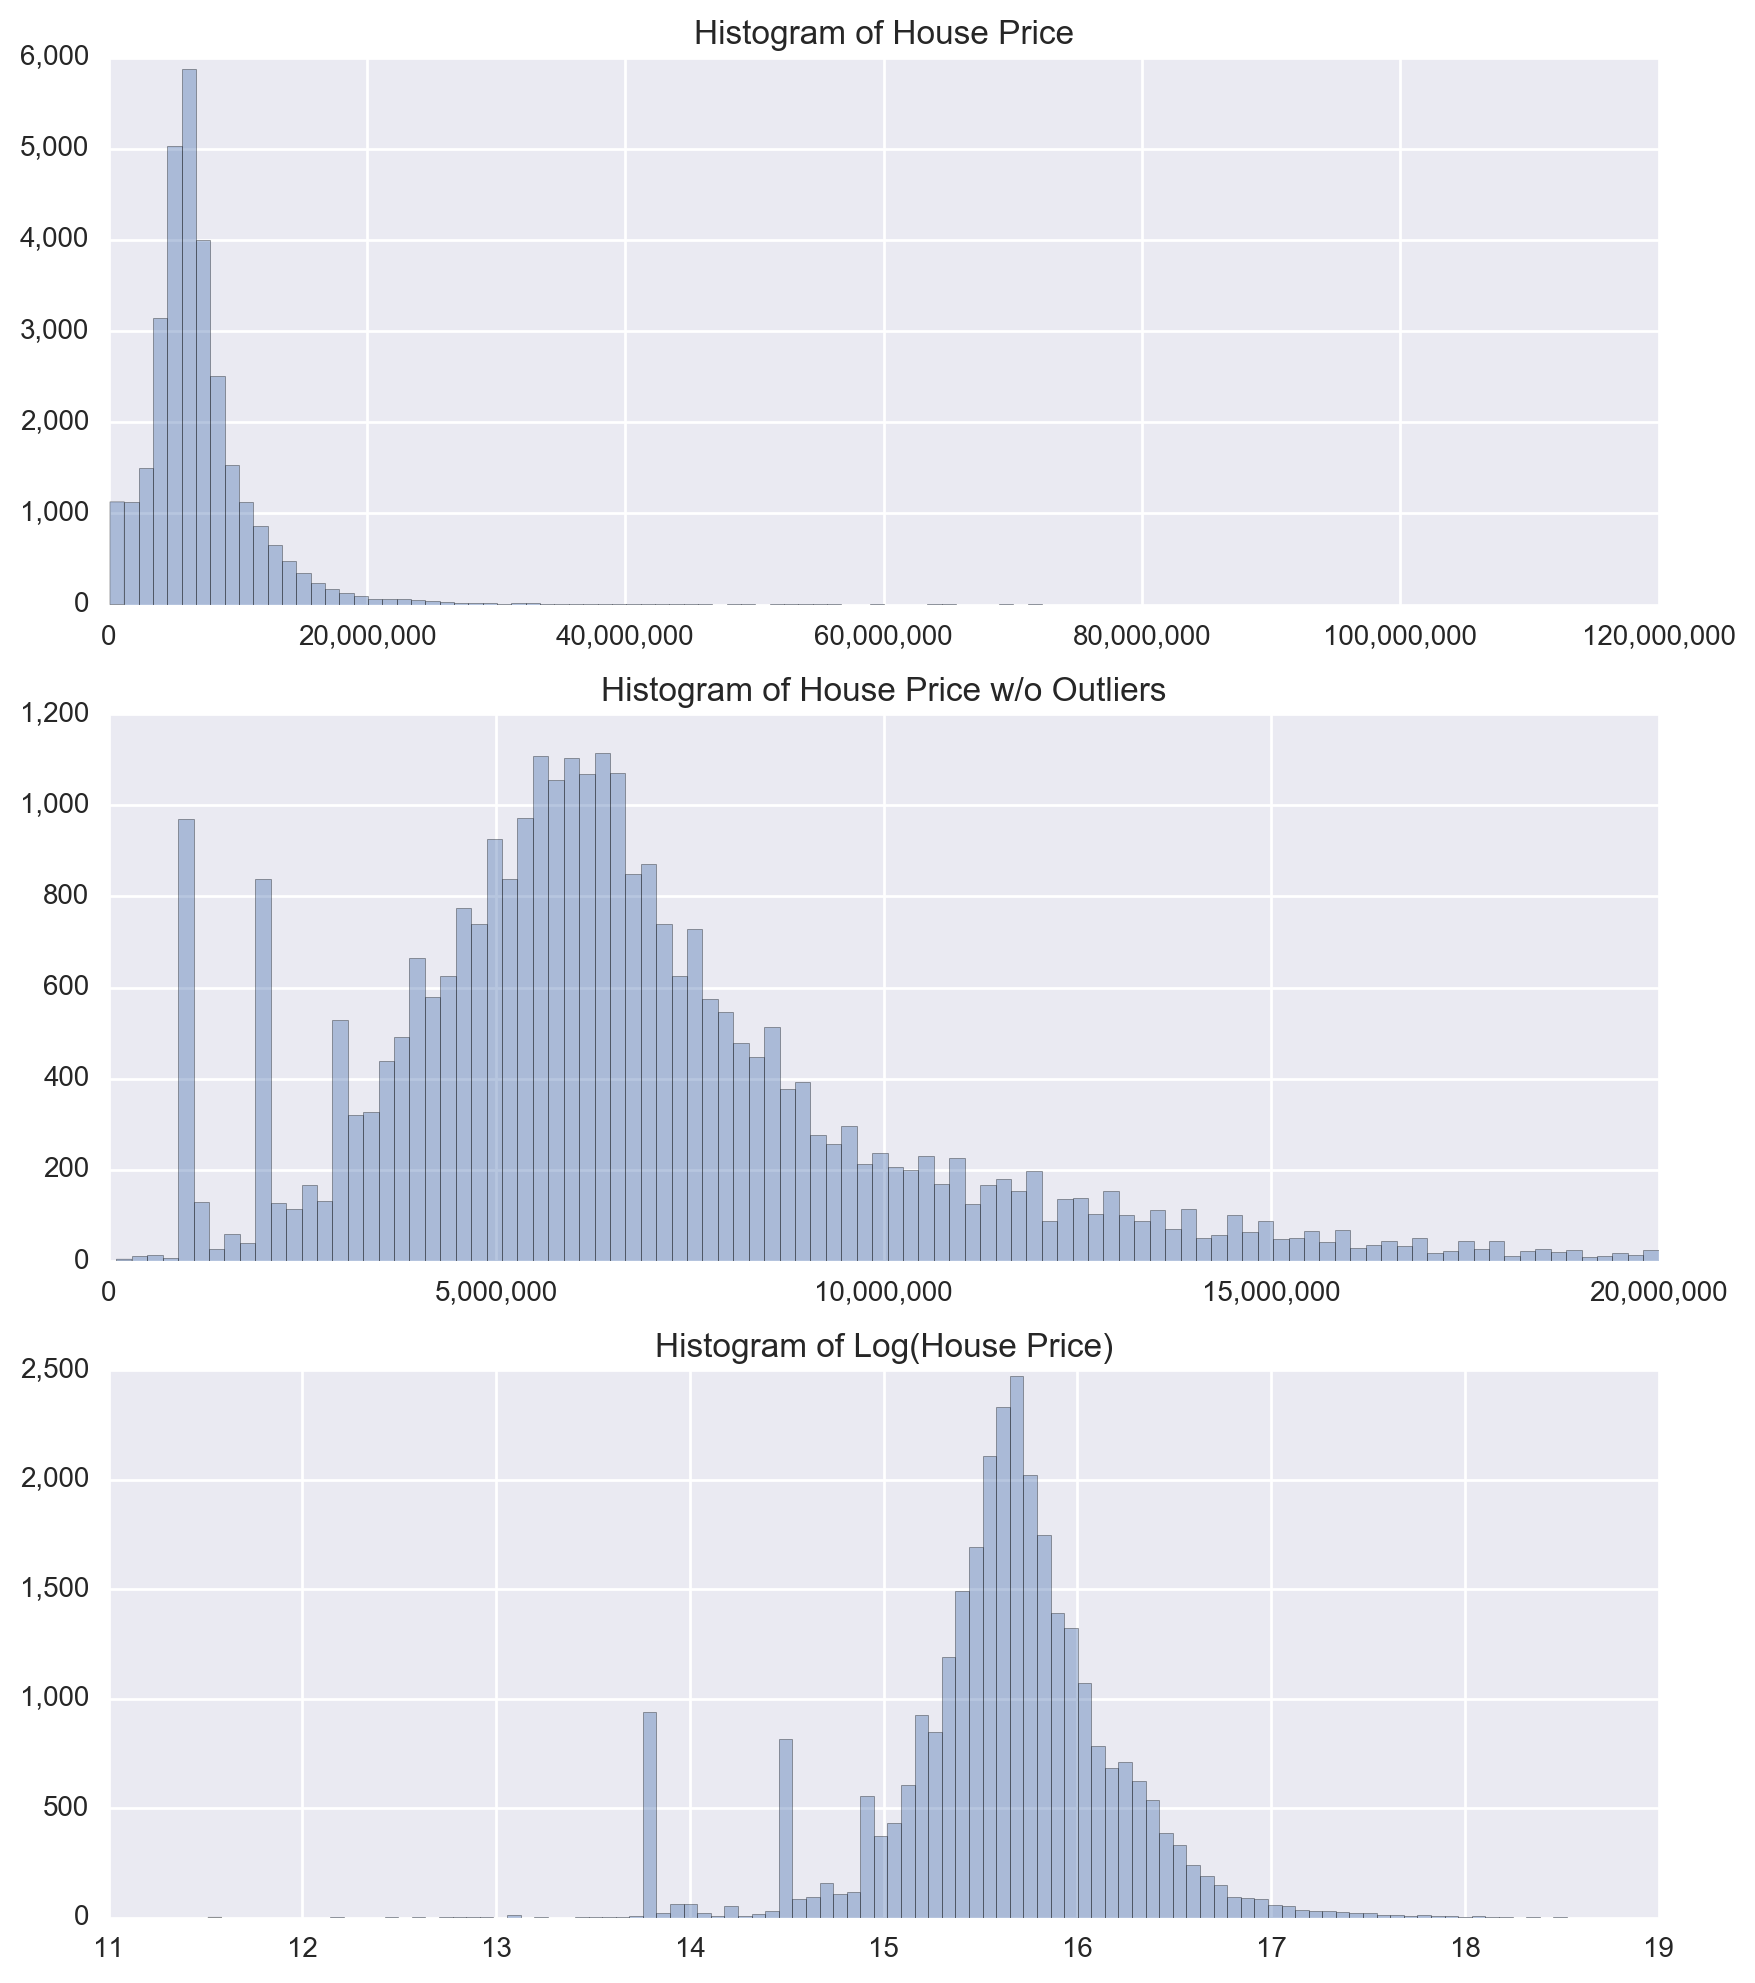

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
sns.distplot(y, bins=100,kde=False, ax=axes[0])
axes[0].set_title("Histogram of House Price")
sns.distplot(y[y <= .2*1e8], bins=100, kde=False, ax=axes[1])
axes[1].set_title("Histogram of House Price w/o Outliers")
sns.distplot(log_y, bins=100, kde=False, ax=axes[2])
axes[2].set_title("Histogram of Log(House Price)")
for ax in axes:
    ax.set_xlabel(" ")
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,}".format(int(x))))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,}".format(int(x))))

<a id="House Prices Over Time"></a>
## House Prices Over Time

In [128]:
df_price = df_train[['timestamp', 'price_doc']].copy()
df_price['year'] = df_price.timestamp.dt.year
df_price['month'] = df_price.timestamp.dt.month
df_price.set_index('timestamp', inplace=True)
df_price['log_price'] = np.log(df_price['price_doc'])
df_price.head()

,price_doc,year,month,log_price
timestamp,,,,
2011-08-20,5850000,2011,8,15.581952
2011-08-23,6000000,2011,8,15.607270
2011-08-27,5700000,2011,8,15.555977
2011-09-01,13100000,2011,9,16.388123
2011-09-05,16331452,2011,9,16.608603


In [130]:
prices_yearly = df_price.price_doc.groupby(by=df_price.year).agg([np.mean, np.median])
prices_yearly.head()

,mean,median
year,,
2011,5929668,5500000
2012,6354435,5650000
2013,6712149,5900000
2014,7449467,6552000
2015,8183913,7100000


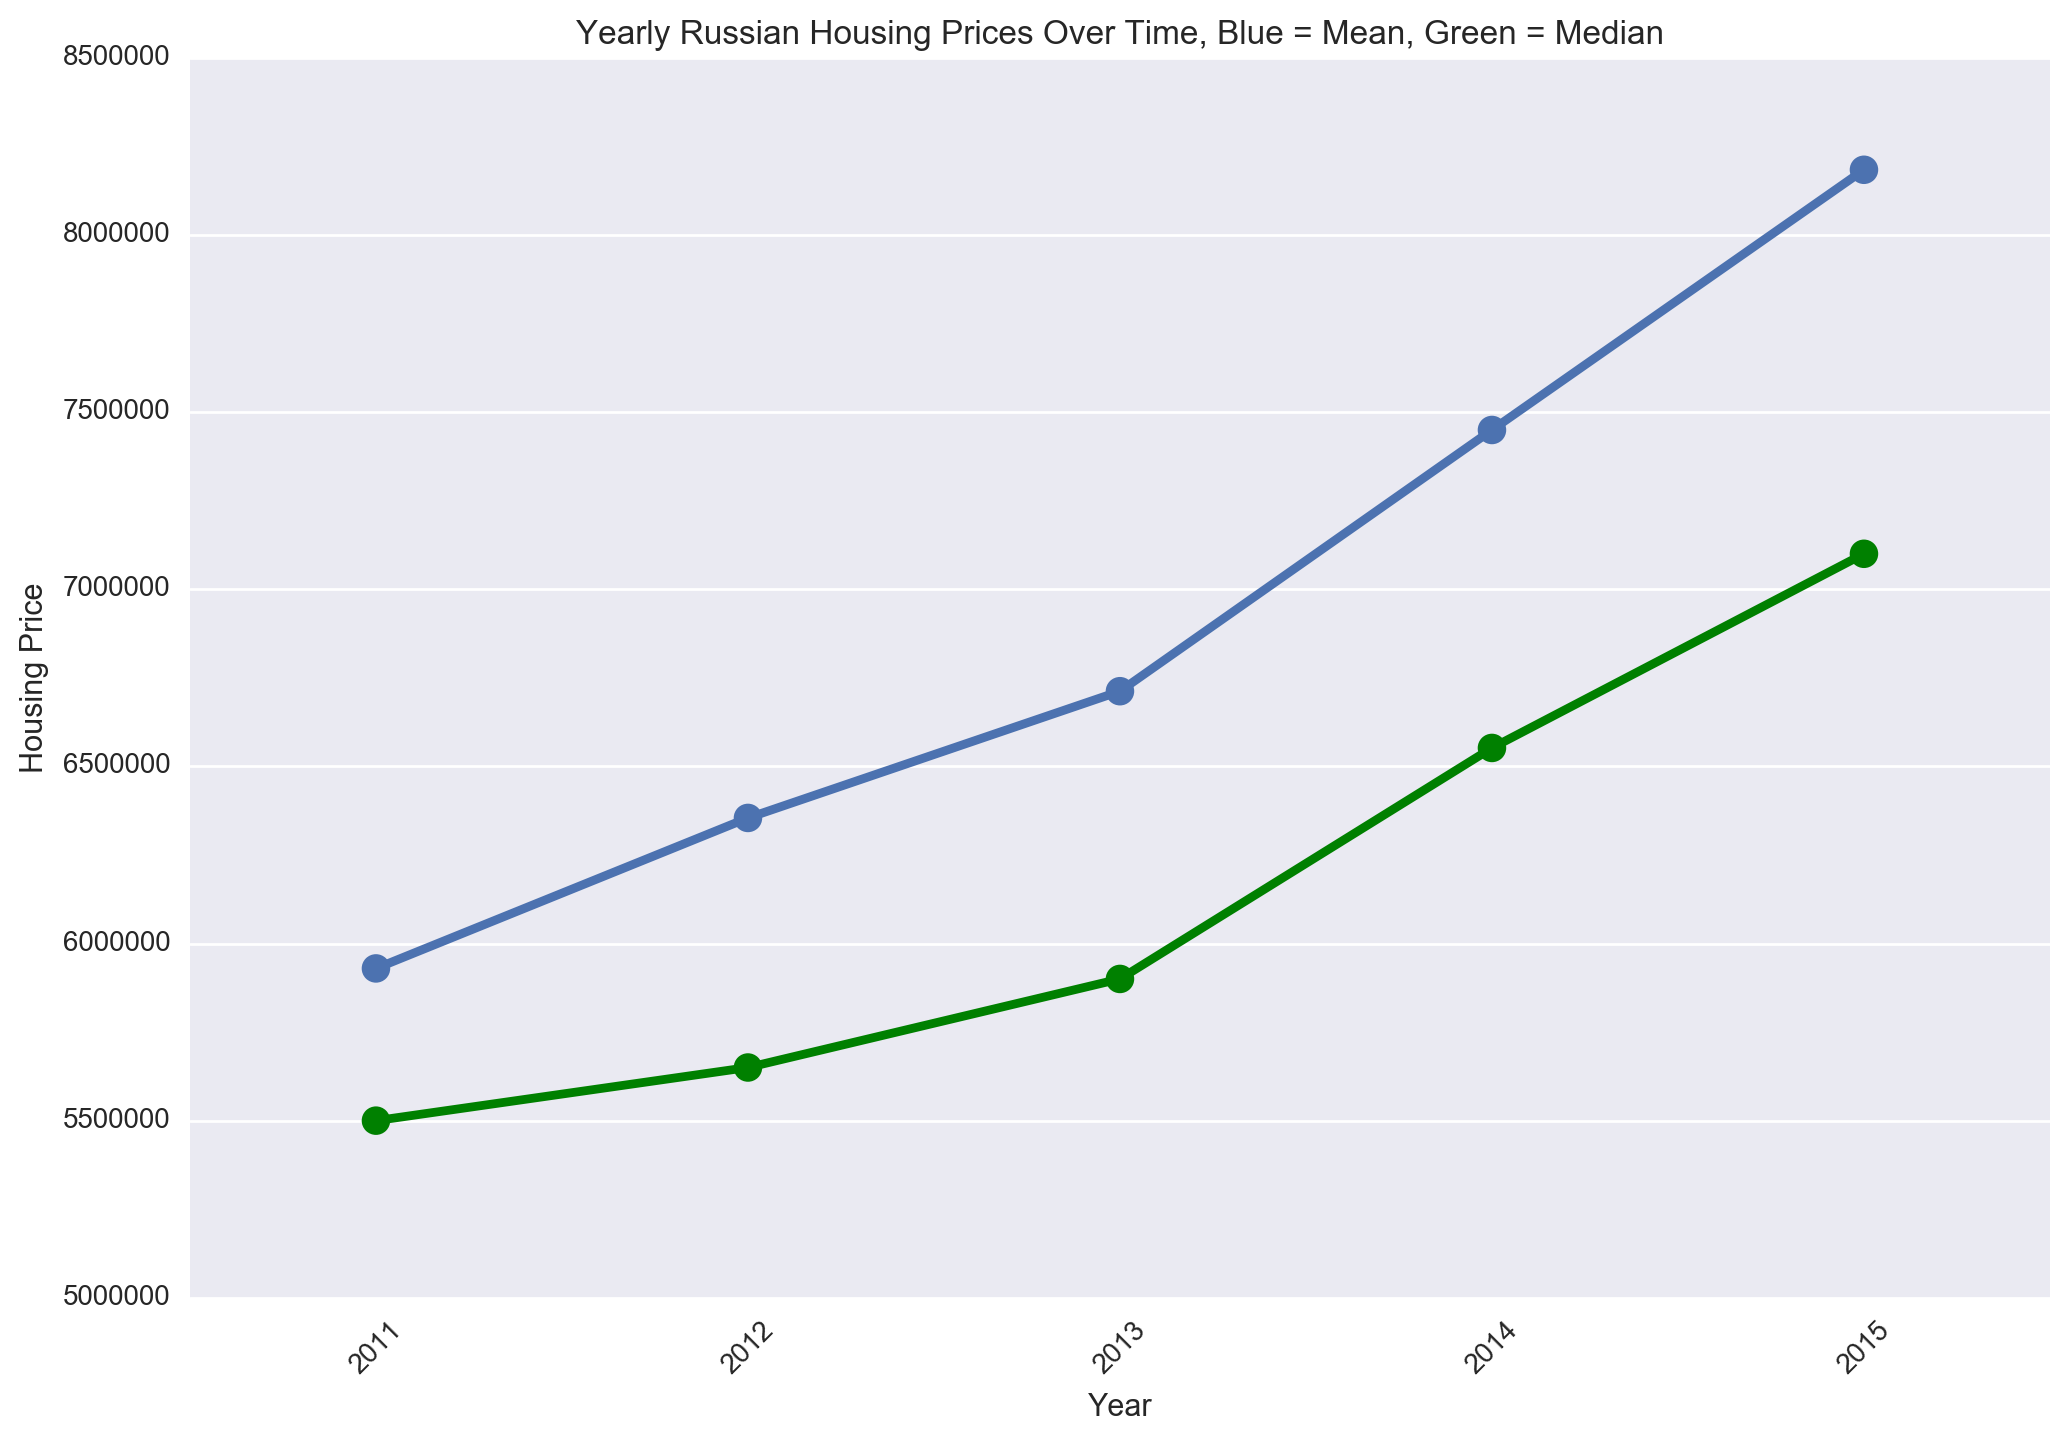

In [134]:
plt.figure(figsize=(12,8))
sns.pointplot(x=prices_yearly.index, y=prices_yearly['mean'])
sns.pointplot(x=prices_yearly.index, y=prices_yearly['median'], color='green')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Housing Price")
plt.title("Yearly Russian Housing Prices Over Time, Blue = Mean, Green = Median")

In [127]:
prices_monthly = df_price.price_doc.groupby(by=[df_price.index.year, df_price.index.month]).agg([np.mean, np.median])
prices_monthly.head()

mean   median
2011 8   5850000  5850000
     9   6007329  5200000
     10  5808421  5500000
     11  6115835  5600000
     12  5824305  5450000

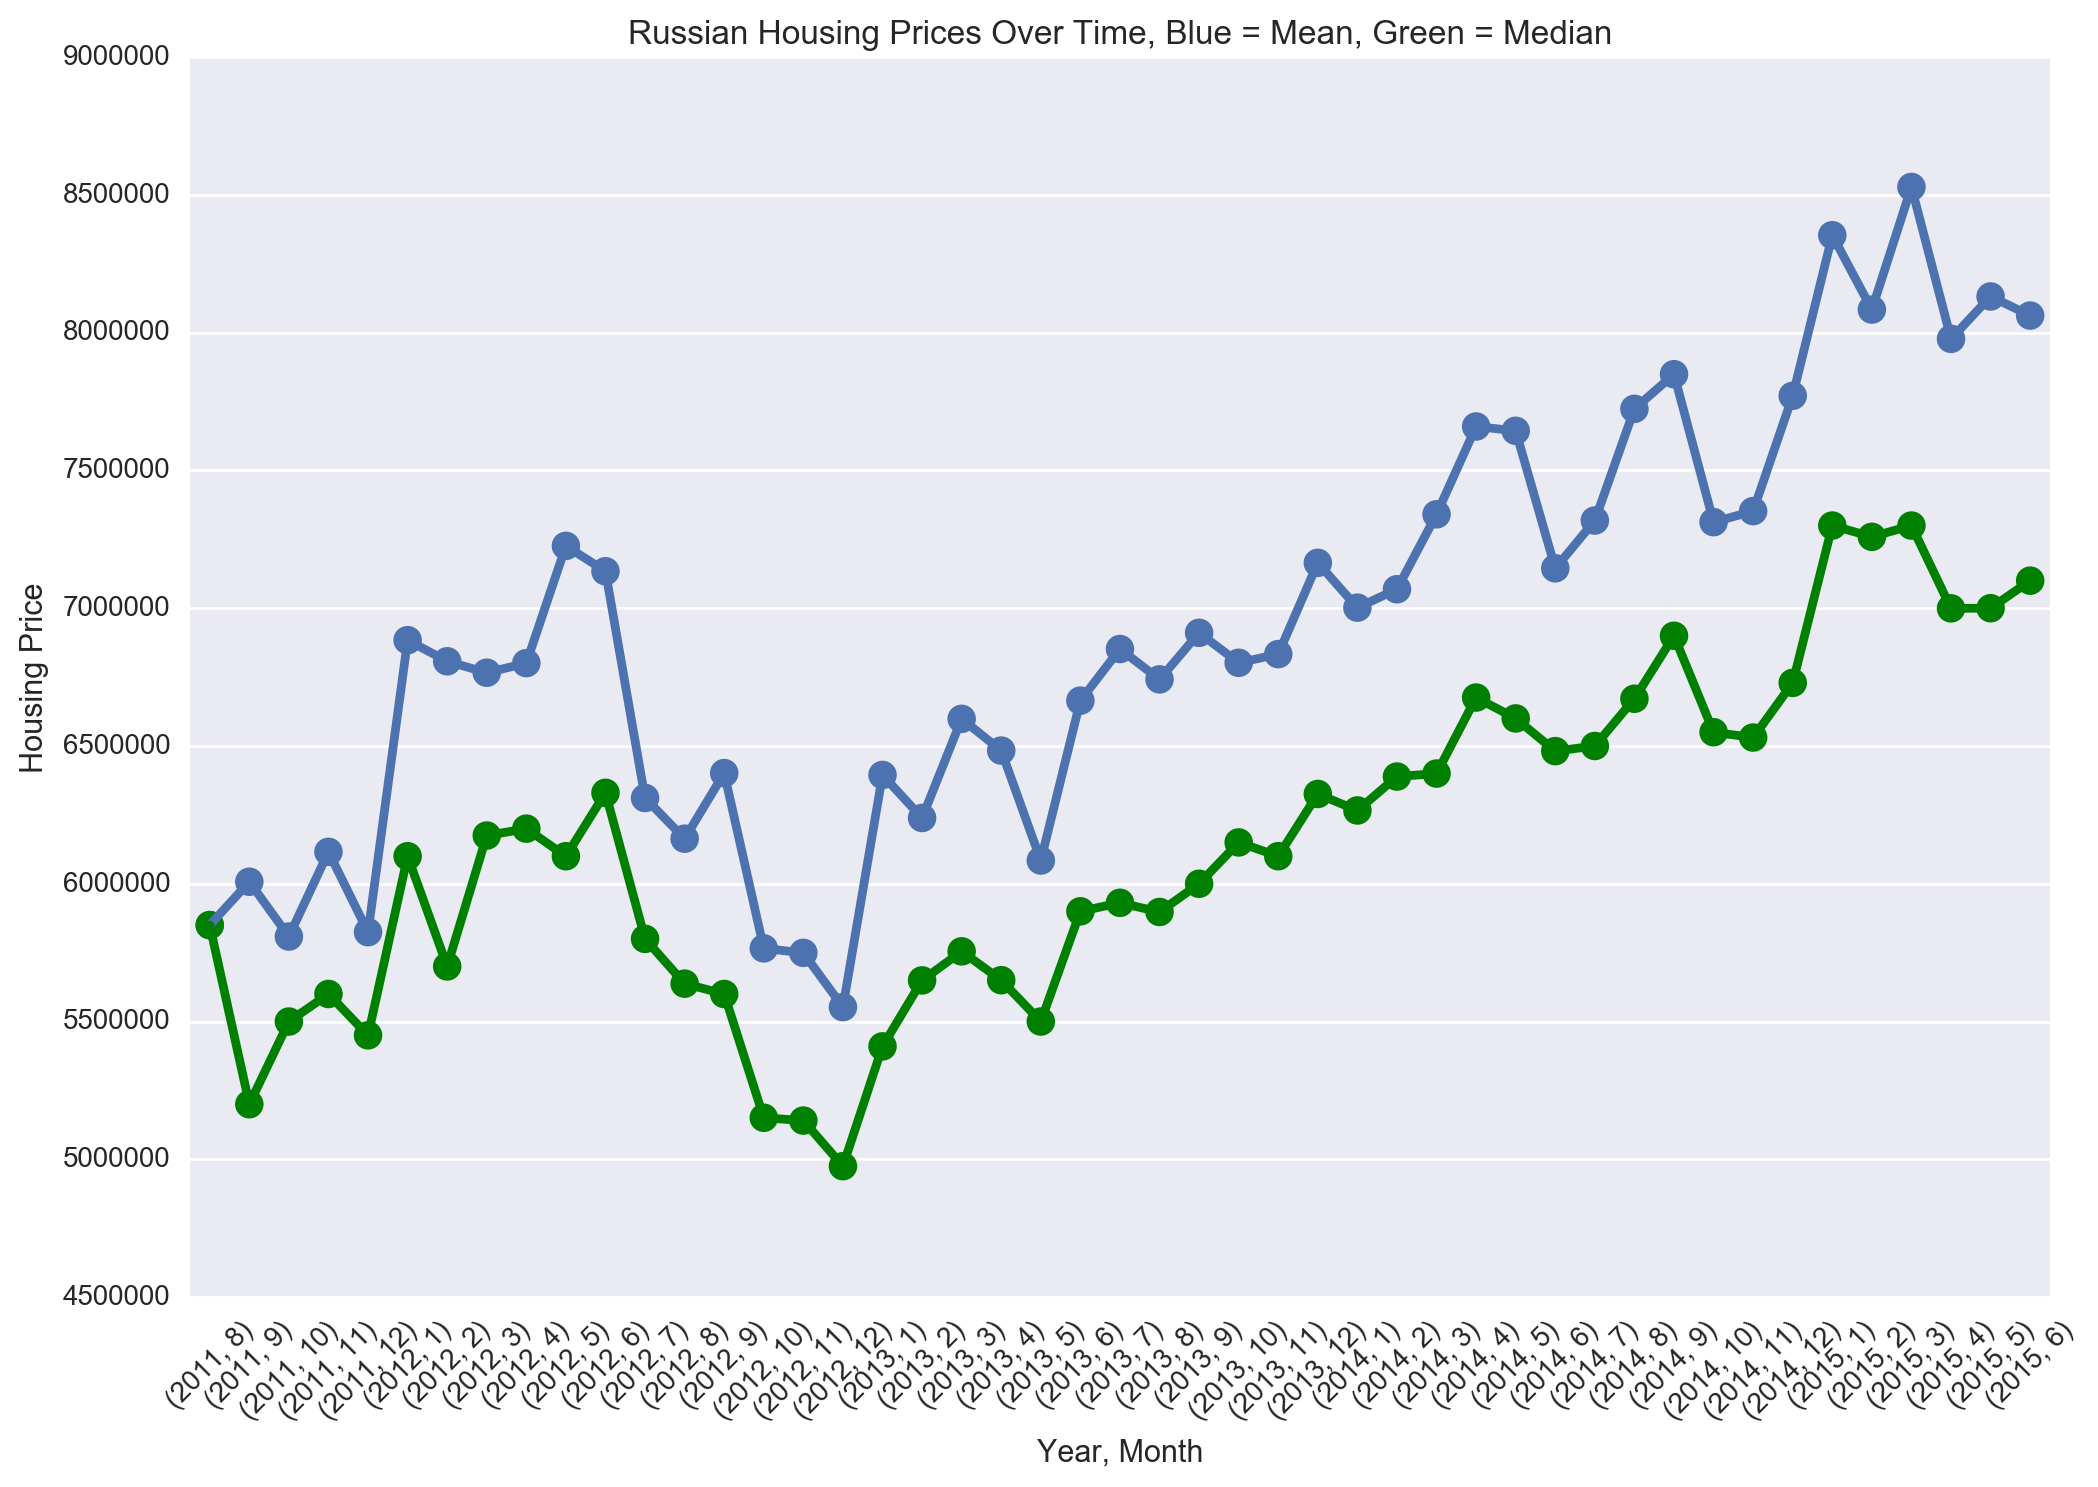

In [129]:
plt.figure(figsize=(12,8))
sns.pointplot(x=test.index, y=test['mean'])
sns.pointplot(x=test.index, y=test['median'], color='green')
plt.xticks(rotation=45)
plt.xlabel("Year, Month")
plt.ylabel("Housing Price")
plt.title("Monthly Russian Housing Prices Over Time, Blue = Mean, Green = Median")

In [135]:
prices_weekly = df_price.price_doc.groupby(by=[df_price.index.year, df_price.index.weekofyear]).agg([np.mean, np.median])
prices_weekly.head()

mean    median
2011 33   5850000   5850000
     34   5850000   5850000
     35  13100000  13100000
     36   7646290   5500000
     37   4137500   4725000

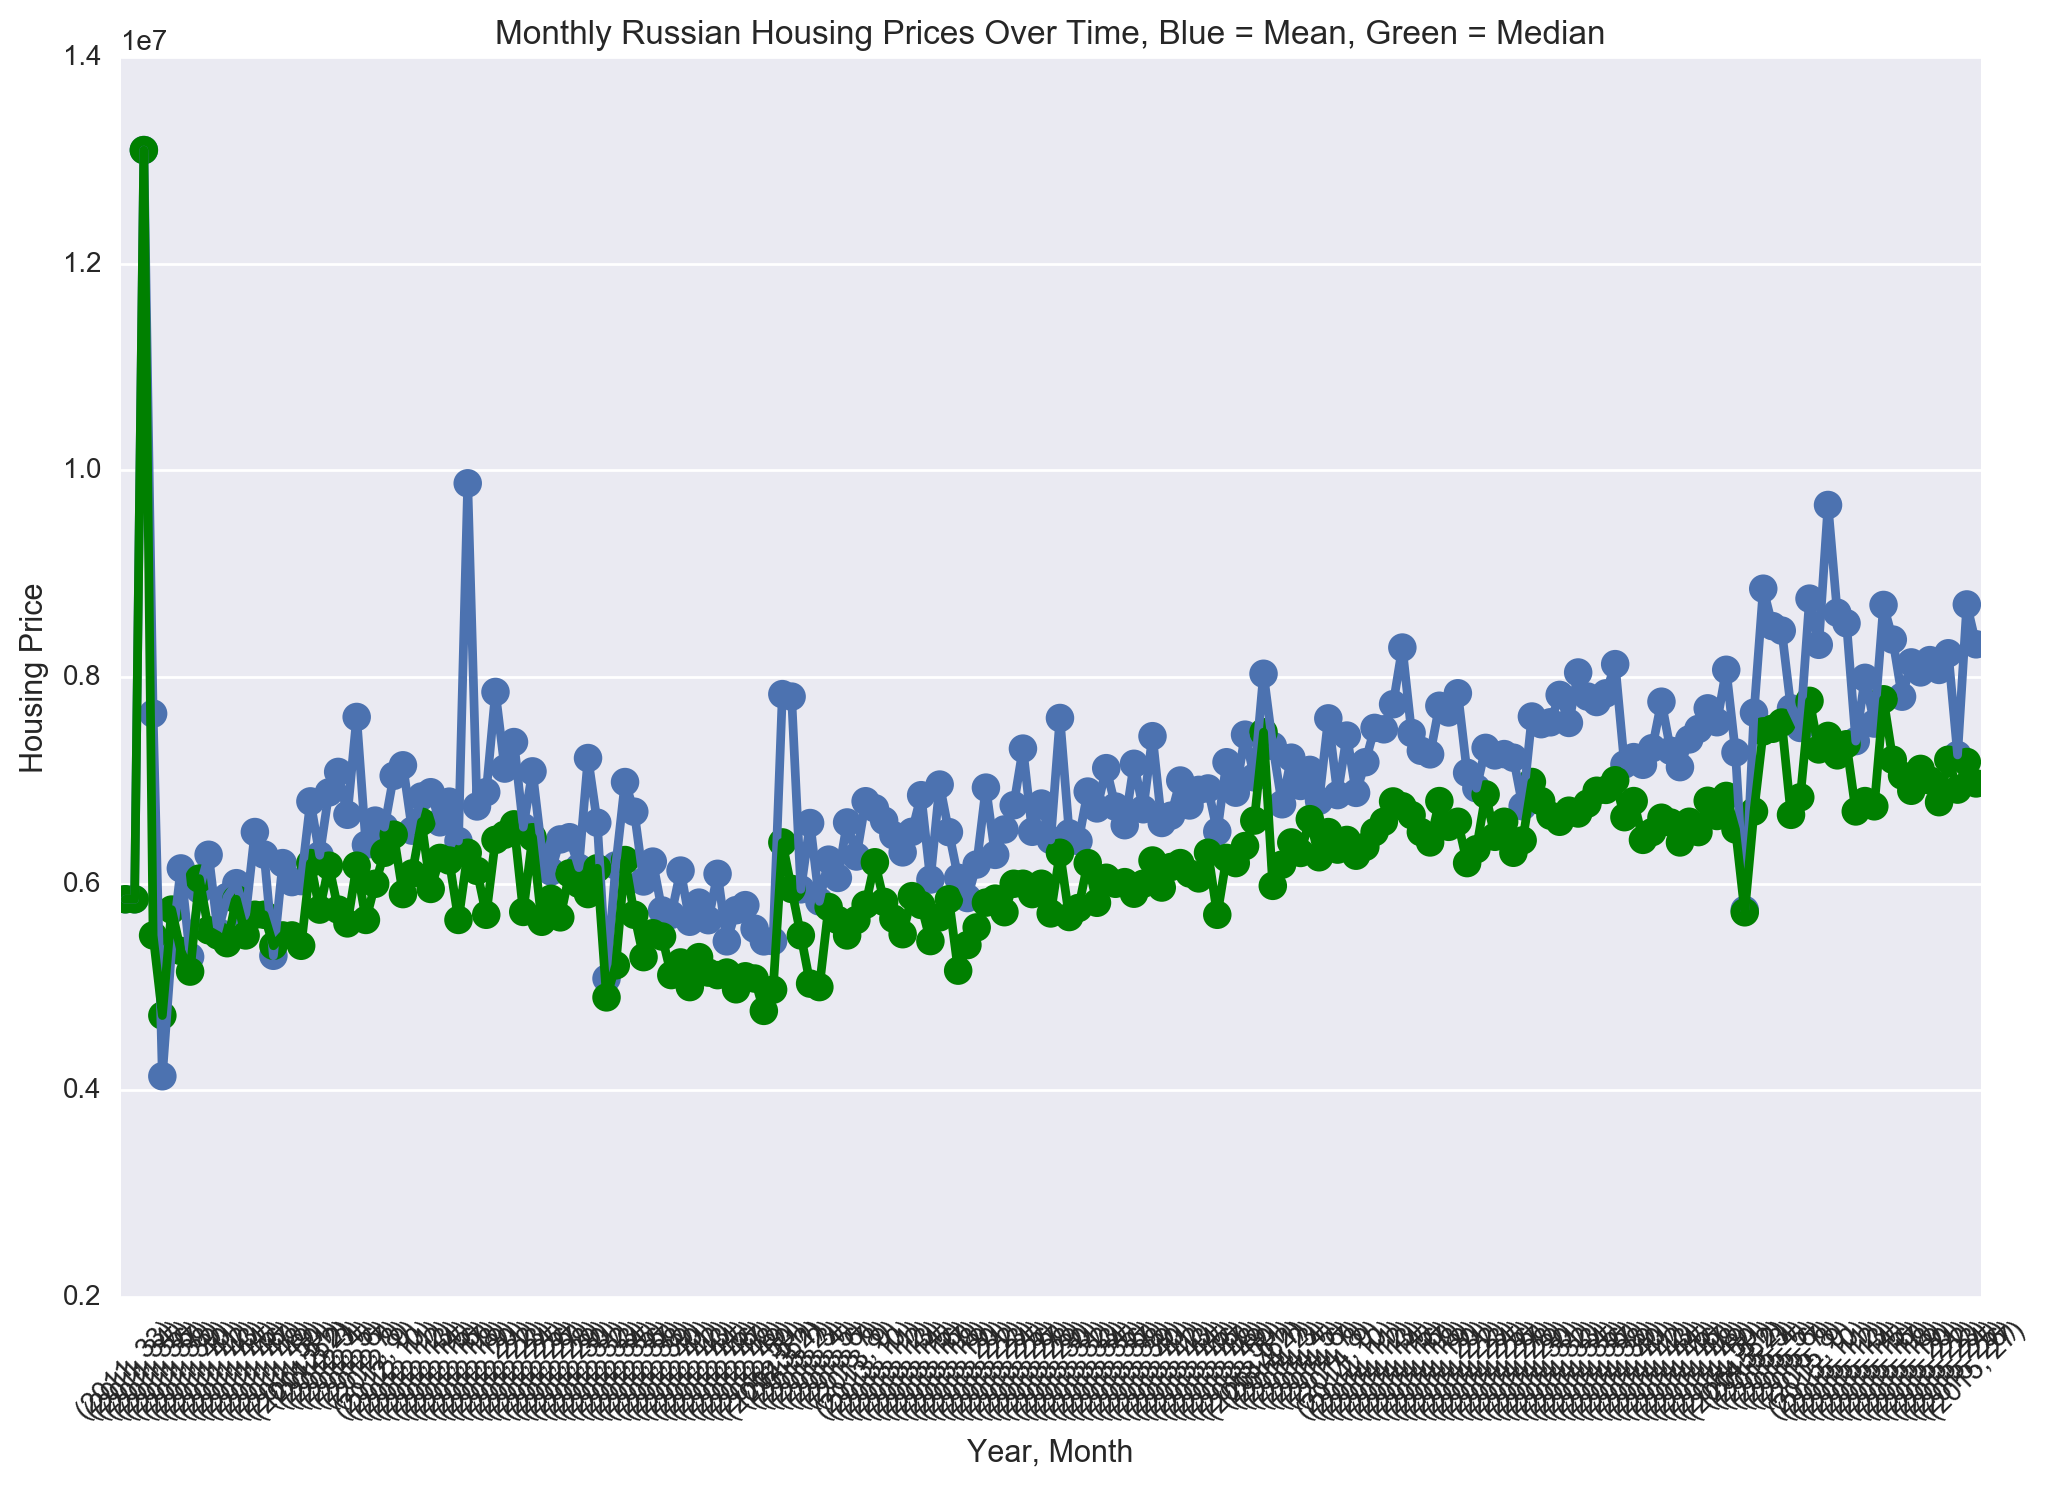

In [136]:
plt.figure(figsize=(12,8))
sns.pointplot(x=prices_weekly.index, y=prices_weekly['mean'])
sns.pointplot(x=prices_weekly.index, y=prices_weekly['median'], color='green')
plt.xticks(rotation=45)
plt.xlabel("Year, Month")
plt.ylabel("Housing Price")
plt.title("Monthly Russian Housing Prices Over Time, Blue = Mean, Green = Median")

<a id="Missing Data"></a>
## Missing Data

How much of the data is missing?

In [35]:
missing_values = df_train.isnull().sum()[df_train.isnull().sum() > 0]
missing_values = pd.DataFrame(missing_values, columns=['count'])
missing_values.sort_values(by='count', ascending=False, inplace=True)
#missing_values.head()

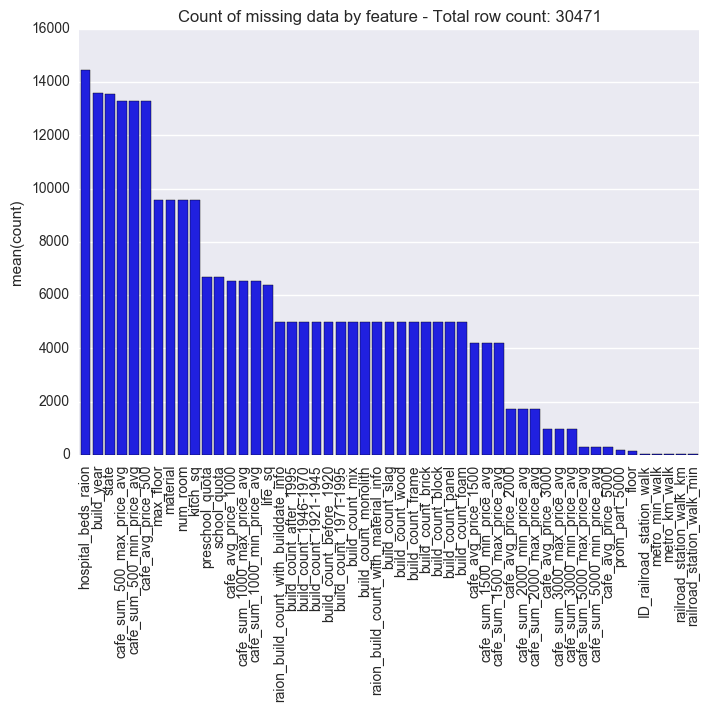

In [47]:
sns.barplot(x=missing_values.index, y=missing_values['count'], color='blue')
plt.title("Count of missing data by feature - Total row count: " + str(len(df_train)))
plt.xticks(rotation=90)
plt.show()

In [140]:
print("There are {:.0f} columns, {:.0f} have missing values.".format(len(df_train.columns), len(missing_values))) 

There are 292 columns, 51 have missing values.


<a id="House Size vs. Price"></a>
## House Size vs. Price

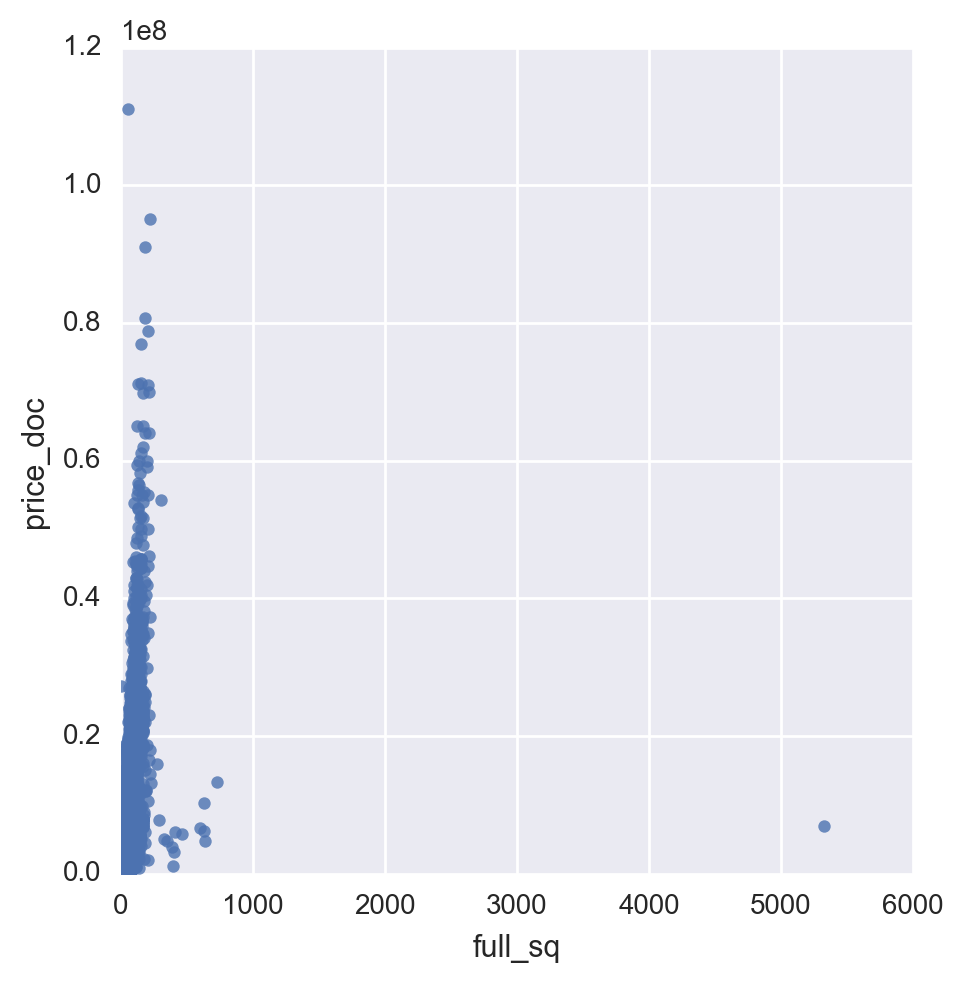

In [147]:
sns.lmplot(x='full_sq', y='price_doc', data=df_train, fit_reg=False)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

There is an obvious outlier here. It is not clear whether it is an entry error. For now, let's remove it.

In [148]:
# Removing above outlier
df_train = df_train[df_train.full_sq < 5000]

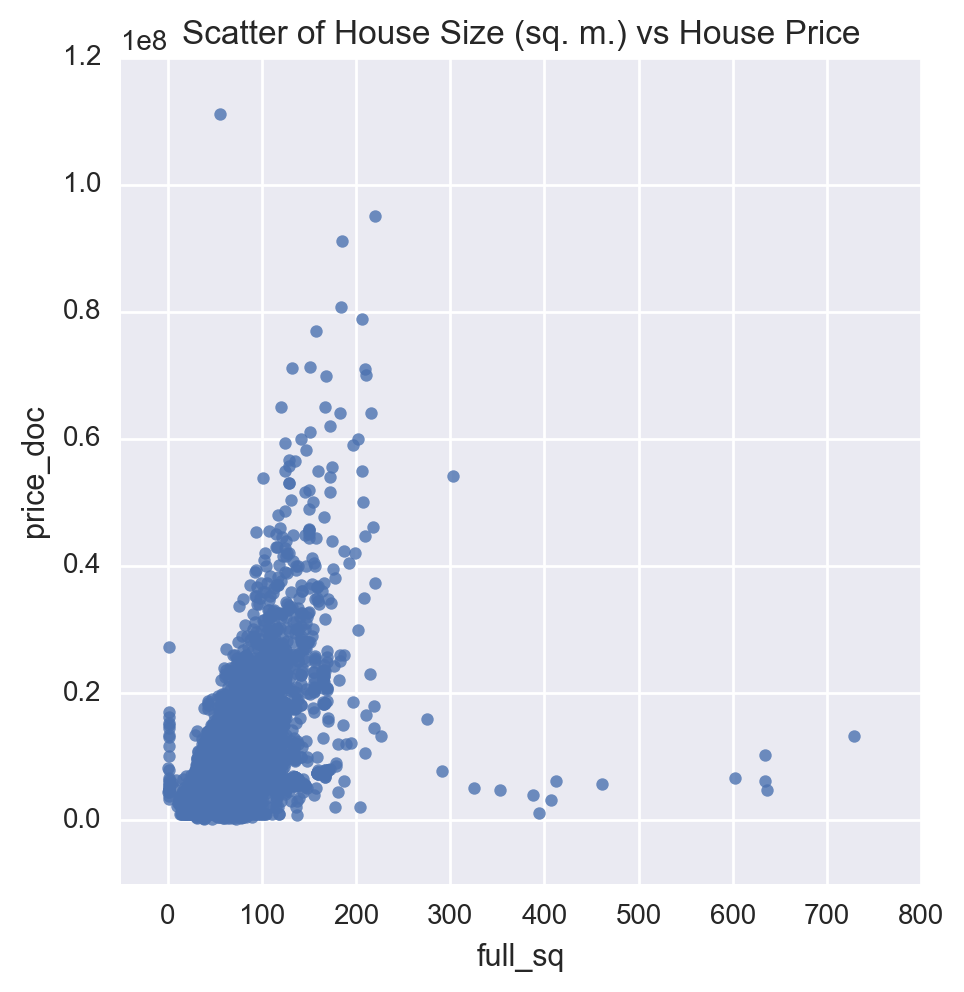

In [152]:
sns.lmplot(x='full_sq', y='price_doc', data=df_train, fit_reg=False)
plt.title("Scatter of House Size (sq. m.) vs House Price")
plt.xlim(xmin=-50)
plt.ylim(ymin=-0.1*1e8)
plt.show()

In [153]:
len(df_train[df_train.full_sq > df_train.life_sq])

21300

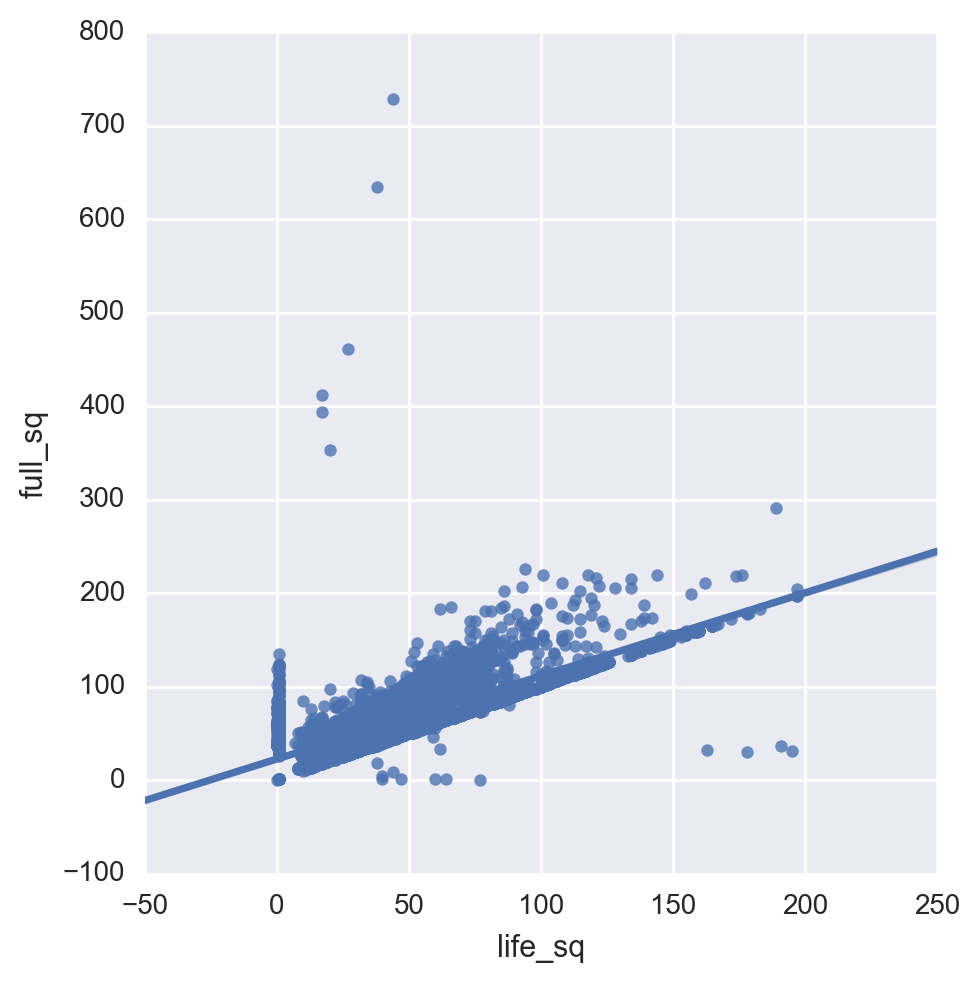

In [159]:
sns.lmplot(x='life_sq', y='full_sq', data=df_train[df_train.life_sq < 200])

In [30]:
# Testing to see if there is some correlation between ratio of floor to max floor and price
# As in, the penthouse is worth more
test = df_train[['price_doc', 'floor', 'max_floor']]
test = test[test.floor.notnull() & test.max_floor.notnull()]
test.isnull().sum()
test['ratio'] = test.floor / test.max_floor
test.ratio = np.round(test.ratio, 1)
test = test[test.ratio <= 1.0]
#plt.figure(figsize=(12,8))
#sns.boxplot(x=test.ratio, y=test.price_doc)

# Conclusion - maybe, maybe not

In [9]:
df_train.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

### Target Variable Processing

### Plotting to test assumptions

1. Prices should naturally increase over time